In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [16]:
cg_data = np.load('../../../deterministic/64x64/xi_calculation_visualization/coarse_grained_vel_data/coarse_grained_vel_data_t=50_to_t=100_grid_64_c_1by64.npz')

In [17]:
vel_data_t = cg_data['vel_data_truth'] # coarse-grained vel. data at observation points ('truth')
vel_data_t.shape

(50, 9, 2)

In [18]:
ref_sol = np.load('../../../deterministic/64x64/data_from_deterministic_run/adap_sol_Re_4e4_mesh_64_vel_data_t50_onwards.npz')

In [19]:
vel_data_ref = ref_sol['vel_data_det'] # coarse-grained vel. data at observation points ('truth')
vel_data_ref.shape

(41, 9, 2)

In [20]:
det_data = np.load('../../../deterministic/64x64/data_from_deterministic_run/Re_4e4_mesh_64_vel_data_deterministic_t50_onwards.npz')

In [21]:
vel_data_det = det_data['vel_data_det']
vel_data_det.shape

(41, 9, 2)

In [22]:
gridpoints = cg_data['gridpoints']

In [23]:
n_tsteps = 21
n_obs_points = gridpoints.shape[0]
n_stoch_sim_1 = 30

[Text(0, 0.5, '\\bf {velocity} $x$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $x$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $x$ \\bf{component}')]

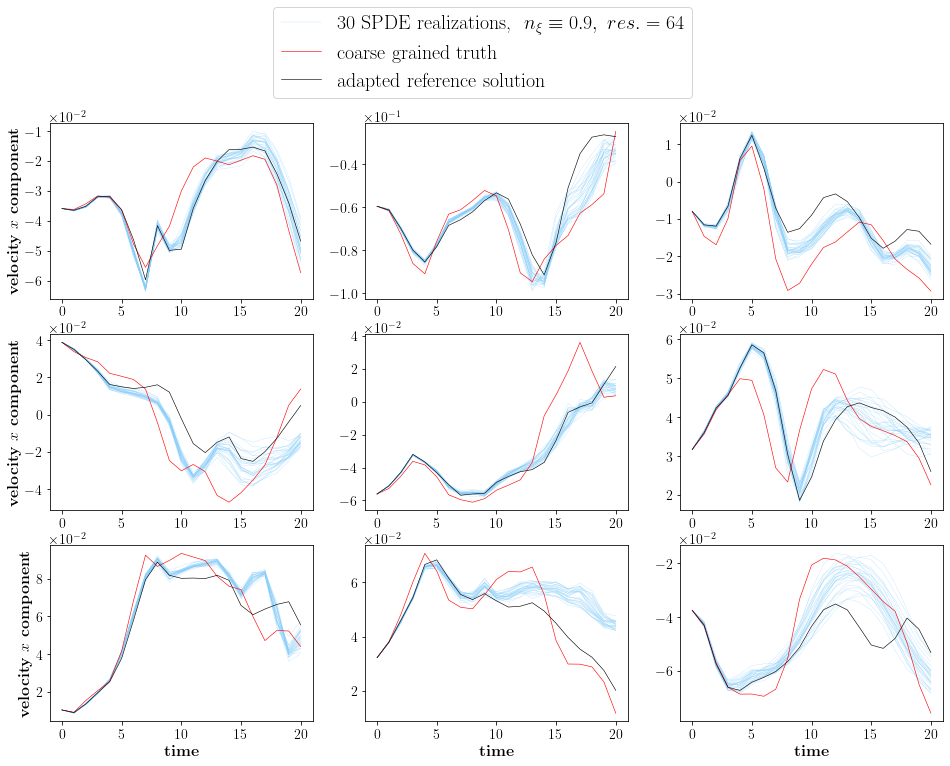

In [24]:
fig, ax = plt.subplots(3,3, figsize=(16, 11))
for k in range(n_stoch_sim_1):
    data_stoch = np.load('../data_from_stochastic_run/Re_4e4_var_90_mesh_64_vel_data_particle_'+str(k)+'_t50_onwards.npz')
    vel_data_stoch = data_stoch['vel_data_sto']   
    n = 0
    for i in [2,1,0]:
        for j in [0,1,2]:
            if k == 0:
                ax[i,j].plot(vel_data_stoch[:n_tsteps,n,0], linewidth=0.2,color="lightskyblue", label = r'30 SPDE realizations, $\ n_{\xi}\equiv 0.9, \ res.= 64$')
            else:
                ax[i,j].plot(vel_data_stoch[:n_tsteps,n,0], linewidth=0.2,color="lightskyblue")
            ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
            n += 1
n = 0
for i in [2,1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(vel_data_t[:n_tsteps,n,0], label = 'coarse grained truth', linewidth=.6, color="red")
        ax[i,j].plot(vel_data_ref[:n_tsteps,n,0], label = 'adapted reference solution', linewidth=.6, color="black")
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04))
plt.setp(ax[-1, :], xlabel=r'\bf {time}')
plt.setp(ax[:, 0], ylabel=r'\bf {velocity} $x$ \bf{component}')
# plt.savefig('../plots/x_vel_mesh_64_var_90_part_30_vs_truth_vs_adap_sol.pdf',bbox_inches='tight')

[Text(0, 0.5, '\\bf {velocity} $y$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $y$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $y$ \\bf{component}')]

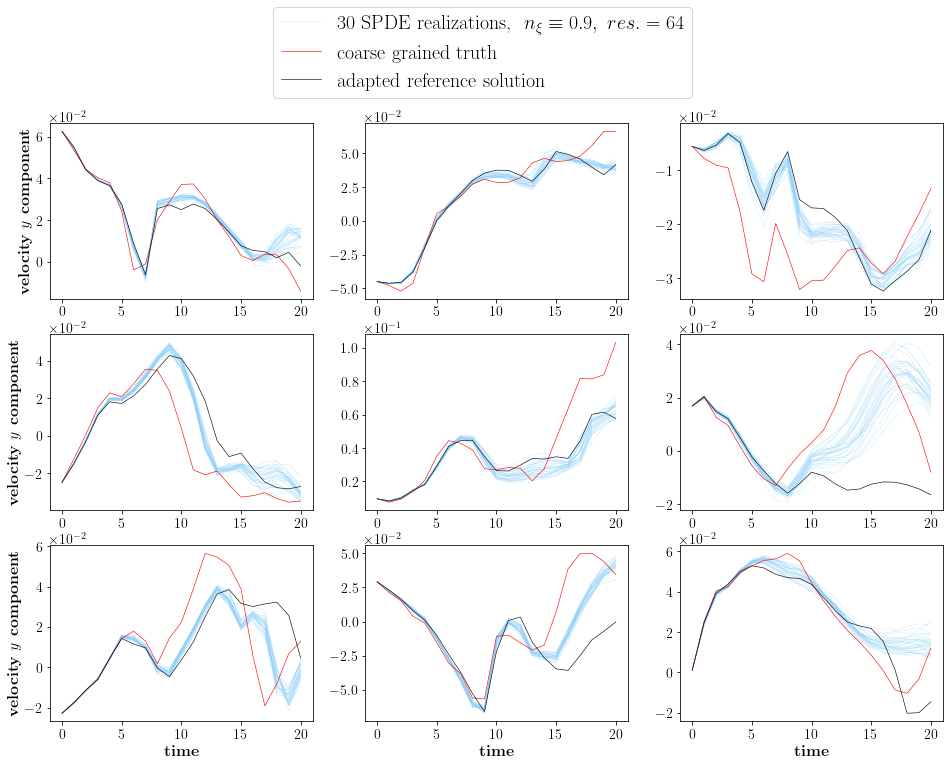

In [26]:
fig, ax = plt.subplots(3,3, figsize=(16, 11))
for k in range(n_stoch_sim_1):
    data_stoch = np.load('../data_from_stochastic_run/Re_4e4_var_90_mesh_64_vel_data_particle_'+str(k)+'_t50_onwards.npz')
    vel_data_stoch = data_stoch['vel_data_sto']   
    n = 0
    for i in [2,1,0]:
        for j in [0,1,2]:
            if k == 0:
                ax[i,j].plot(vel_data_stoch[:n_tsteps,n,1], linewidth=0.2,color="lightskyblue", label = r'30 SPDE realizations, $\ n_{\xi}\equiv 0.9, \ res.= 64$')
            else:
                ax[i,j].plot(vel_data_stoch[:n_tsteps,n,1], linewidth=0.2,color="lightskyblue")
            # ax[i,j].set_title('stochastic sim, x-vel at:'+ str(gridpoints[n,:]))
            # print((i,j, n))
            # ax[i,j].legend()
            ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
            n += 1
n = 0
for i in [2,1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(vel_data_t[:n_tsteps,n,1], label = 'coarse grained truth', linewidth=0.6, color="red")
        ax[i,j].plot(vel_data_ref[:n_tsteps,n,1], label = 'adapted reference solution', linewidth=0.6, color="black")
        # ax[i,j].set_title('x-velocity at:'+ str(gridpoints[n,:]))
        # print((i,j, n))
        # ax[i,j].legend()
        n += 1

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04))
plt.setp(ax[-1, :], xlabel=r'\bf {time}')
plt.setp(ax[:, 0], ylabel=r'\bf {velocity} $y$ \bf{component}')
# plt.savefig('../plots/y_vel_mesh_64_var_90_part_30_vs_truth_vs_adap_sol.pdf',bbox_inches='tight')